## Setting Data


In [4]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [5]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Gen RAM Free: 12.1 GB  | Proc size: 1.1 GB
GPU RAM Free: 14852MB | Used: 227MB | Util   2% | Total 15079MB


In [6]:
import pandas as pd
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/Data')

Drive already mounted at /content/Data; to attempt to forcibly remount, call drive.mount("/content/Data", force_remount=True).


In [8]:
data = pd.read_csv("/content/Data/MyDrive/Technocolabs/technocolabs training set.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5,6,7,14,16,17,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
data["skipped"] = np.where(data['not_skipped'], False, True)
data = data.drop(['not_skipped','skip_1','skip_2','skip_3'],axis=1)
data = data.rename(columns={"track_id_clean": "track_id"})
#data = data.drop('session_id',axis=1)

In [78]:
data.columns

Index(['session_id', 'session_position', 'session_length', 'track_id',
       'context_switch', 'no_pause_before_play', 'short_pause_before_play',
       'long_pause_before_play', 'hist_user_behavior_n_seekfwd',
       'hist_user_behavior_n_seekback', 'hist_user_behavior_is_shuffle',
       'hour_of_day', 'date', 'premium', 'context_type',
       'hist_user_behavior_reason_start', 'hist_user_behavior_reason_end',
       'skipped'],
      dtype='object')

In [10]:
t1 = pd.read_csv("/content/Data/MyDrive/Technocolabs/20181120_track_features/track_features/tf_000000000000.csv")
t2 = pd.read_csv("/content/Data/MyDrive/Technocolabs/20181120_track_features/track_features/tf_000000000001.csv")

In [11]:
track_feat = pd.concat([t1, t2], ignore_index=True)

In [ ]:
track_feat.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_2e8f4b71-8a0b-4b9c-b7d8-fb5208e87f9f,326.013336,1971,99.582885,0.716209,0.366495,0.332605,0.439835,5.805774,0.238847,1.010700,100.370003,4,0.223395,0.146012,-0.706908,0.259496,0.481157,0.238427,-0.098389,-0.254960,-0.227383
1,t_dae2ec0e-ec7b-4b3e-b60c-4a884d0eccb0,147.813324,1963,97.272035,0.839460,0.362212,0.389829,0.507580,6.845427,0.420476,1.000398,141.334000,4,0.484702,0.039554,-0.539554,0.105141,0.692589,0.226047,-0.468162,0.164389,-0.769024
2,t_cf0164dd-1531-4399-bfa6-dec19cd1fedc,110.400002,1974,99.620384,0.054673,0.495002,0.589378,0.552311,9.361949,0.842938,0.957766,138.889999,4,0.818441,0.083863,-0.242108,-0.014258,0.096396,0.417641,-0.050576,-0.204757,-0.172563
3,t_0f90acc7-d5c5-4e53-901d-55610fbd090c,237.653336,1988,96.796830,0.042606,0.389634,0.359044,0.585673,6.068578,0.665398,0.947322,133.139008,4,0.594829,0.192498,0.340039,0.034846,-0.389794,0.518381,0.185008,-0.079907,-0.016978
4,t_36b9ad02-095a-443d-a697-6c7285d9410a,174.600006,1987,97.905891,0.249982,0.513640,0.485435,0.635095,7.198735,0.408715,1.014063,152.212006,4,0.591289,0.270586,-0.411061,0.165898,0.225652,0.335518,-0.036643,-0.016300,-0.446870


In [ ]:
data.head()

,session_position,session_length,track_id,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped
0,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,0.0,0.0,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone,False
1,2.0,20.0,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,0.0,1.0,0.0,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone,False
2,3.0,20.0,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,0.0,1.0,0.0,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone,False
3,4.0,20.0,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,0.0,1.0,0.0,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone,False
4,5.0,20.0,t_64f3743c-f624-46bb-a579-0f3f9a07a123,0.0,1.0,0.0,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone,False


In [12]:
df = pd.merge(data, track_feat, on='track_id')

In [ ]:
df.head()

,session_id,session_position,session_length,track_id,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,skipped,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,0.0,0.0,0.0,0.0,0.0,True,16.0,7/15/2018,True,editorial_playlist,trackdone,trackdone,False,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
1,0_00079a23-1600-486a-91bd-5208be0c745a,7.0,12.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,0.0,1.0,1.0,0.0,0.0,False,17.0,7/15/2018,True,editorial_playlist,fwdbtn,endplay,True,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
2,0_012b0fb4-0cc3-429f-9a78-cc6e622153fb,6.0,20.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,0.0,1.0,1.0,0.0,0.0,False,21.0,7/14/2018,True,user_collection,trackdone,trackdone,False,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
3,0_013cc010-c476-4ad2-8972-73449e0b2ef4,9.0,13.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,1.0,0.0,0.0,0.0,0.0,False,18.0,7/15/2018,True,editorial_playlist,fwdbtn,trackdone,False,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826
4,0_01a5f0dc-9938-48c9-92f1-c7e51f34d290,7.0,12.0,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,0.0,0.0,1.0,1.0,0.0,0.0,True,19.0,7/14/2018,False,editorial_playlist,trackdone,fwdbtn,True,180.066666,2018,99.968133,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,0.003484,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.23016,0.028028,-0.333373,0.015452,-0.35359,0.205826


In [13]:
df = df.sort_values(['session_id','session_position'])
df['session_comp'] = df['session_position']/df['session_length']
df = df.drop(['session_id','session_position','session_length'],axis=1)

In [ ]:
cols = df.columns.tolist()
cols

['track_id',
 'context_switch',
 'no_pause_before_play',
 'short_pause_before_play',
 'long_pause_before_play',
 'hist_user_behavior_n_seekfwd',
 'hist_user_behavior_n_seekback',
 'hist_user_behavior_is_shuffle',
 'hour_of_day',
 'date',
 'premium',
 'context_type',
 'hist_user_behavior_reason_start',
 'hist_user_behavior_reason_end',
 'skipped',
 'duration',
 'release_year',
 'us_popularity_estimate',
 'acousticness',
 'beat_strength',
 'bounciness',
 'danceability',
 'dyn_range_mean',
 'energy',
 'flatness',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mechanism',
 'mode',
 'organism',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'acoustic_vector_0',
 'acoustic_vector_1',
 'acoustic_vector_2',
 'acoustic_vector_3',
 'acoustic_vector_4',
 'acoustic_vector_5',
 'acoustic_vector_6',
 'acoustic_vector_7',
 'session_comp']

In [14]:
cols = ['hour_of_day','date','duration',
 'release_year',
 'us_popularity_estimate',
 'premium','session_comp','context_type','context_switch','no_pause_before_play',
 'short_pause_before_play',
 'long_pause_before_play',
 'hist_user_behavior_n_seekfwd',
 'hist_user_behavior_n_seekback',
 'hist_user_behavior_is_shuffle','hist_user_behavior_reason_start',
 'hist_user_behavior_reason_end','acousticness',
 'beat_strength',
 'bounciness',
 'danceability',
 'dyn_range_mean',
 'energy',
 'flatness',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mechanism',
 'mode',
 'organism',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'acoustic_vector_0',
 'acoustic_vector_1',
 'acoustic_vector_2',
 'acoustic_vector_3',
 'acoustic_vector_4',
 'acoustic_vector_5',
 'acoustic_vector_6',
 'acoustic_vector_7','skipped']

In [15]:
df = df[cols]

In [ ]:
df.head()

,hour_of_day,date,duration,release_year,us_popularity_estimate,premium,session_comp,context_type,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hist_user_behavior_reason_start,hist_user_behavior_reason_end,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped
0,16.0,7/15/2018,180.066666,2018,99.968133,True,0.05,editorial_playlist,0.0,0.0,0.0,0.0,0.0,0.0,True,trackdone,trackdone,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,False
45,16.0,7/15/2018,236.796371,2018,99.896728,True,0.10,editorial_playlist,0.0,1.0,0.0,0.0,0.0,0.0,True,trackdone,trackdone,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,False
50,16.0,7/15/2018,231.266663,2018,99.999976,True,0.15,editorial_playlist,0.0,1.0,0.0,0.0,0.0,0.0,True,trackdone,trackdone,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,major,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,False
327,16.0,7/15/2018,169.826675,2018,99.995038,True,0.20,editorial_playlist,0.0,1.0,0.0,0.0,0.0,0.0,True,trackdone,trackdone,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,major,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,False
353,16.0,7/15/2018,210.545258,2018,99.998498,True,0.25,editorial_playlist,0.0,1.0,0.0,0.0,0.0,0.0,True,trackdone,trackdone,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,major,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,False


# EDA and feature engineering

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
df = df.reset_index()

In [18]:
df = df.drop(['index'],axis=1)

In [19]:
df.head()

,hour_of_day,date,duration,release_year,us_popularity_estimate,premium,session_comp,context_type,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hist_user_behavior_reason_start,hist_user_behavior_reason_end,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped
0,16.0,7/15/2018,180.066666,2018,99.968133,True,0.05,editorial_playlist,0.0,0.0,0.0,0.0,0.0,0.0,True,trackdone,trackdone,0.015848,0.438551,0.473455,0.653119,7.660024,0.553465,1.035007,3.484468e-03,1,0.678553,-6.577,0.546784,major,0.320668,0.069717,134.024994,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,False
1,16.0,7/15/2018,236.796371,2018,99.896728,True,0.10,editorial_playlist,0.0,1.0,0.0,0.0,0.0,0.0,True,trackdone,trackdone,0.061811,0.654804,0.735661,0.877393,11.308750,0.726828,1.025636,1.031315e-07,7,0.104322,-5.319,0.824766,minor,0.131391,0.061158,130.037994,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,False
2,16.0,7/15/2018,231.266663,2018,99.999976,True,0.15,editorial_playlist,0.0,1.0,0.0,0.0,0.0,0.0,True,trackdone,trackdone,0.354116,0.532155,0.540411,0.679719,8.065802,0.563009,1.029465,2.659035e-08,10,0.135776,-5.843,0.774327,major,0.296923,0.045354,145.028000,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,False
3,16.0,7/15/2018,169.826675,2018,99.995038,True,0.20,editorial_playlist,0.0,1.0,0.0,0.0,0.0,0.0,True,trackdone,trackdone,0.769225,0.641756,0.729224,0.864881,11.287586,0.529484,0.993520,6.598388e-06,1,0.103722,-7.756,0.630996,major,0.603271,0.229936,111.982002,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,False
4,16.0,7/15/2018,210.545258,2018,99.998498,True,0.25,editorial_playlist,0.0,1.0,0.0,0.0,0.0,0.0,True,trackdone,trackdone,0.006602,0.732428,0.794881,0.857778,12.181586,0.650057,1.000571,2.066649e-06,8,0.120842,-4.919,0.759465,major,0.170148,0.240980,147.031006,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,False


In [ ]:
df.describe()

,hour_of_day,duration,release_year,us_popularity_estimate,session_comp,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,1.678800e+05,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,14.193084,215.893484,2013.368614,99.744583,0.529783,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,0.217969,0.547847,0.580170,0.668978,9.098028,0.626536,1.008124,3.174287e-02,5.202692,0.189810,-7.049820,0.596501,0.348247,0.142189,122.674906,3.948916,0.459283,-0.516251,0.268847,0.206278,-0.016393,-0.139975,0.047940,-0.283057,0.059859
std,5.996243,60.223626,9.740043,0.892779,0.288231,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,0.246097,0.158555,0.179003,0.159486,2.540397,0.181731,0.038892,1.427120e-01,3.681829,0.150867,3.164024,0.207718,0.188667,0.133225,29.821581,0.336965,0.229190,0.385527,0.193834,0.165442,0.266361,0.313722,0.116279,0.301132,0.261958
min,0.000000,30.013330,1950.000000,90.018900,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647
25%,11.000000,183.503403,2015.000000,99.913831,0.285714,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.030579,0.434064,0.451872,0.562350,7.224558,0.513711,0.989104,3.701751e-09,1.000000,0.099943,-8.232000,0.452991,0.205129,0.044635,97.004997,4.000000,0.280089,-0.841586,0.225853,0.174902,-0.170540,-0.330586,-0.030063,-0.489797,-0.020752
50%,15.000000,212.027023,2017.000000,99.988785,0.538462,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.115362,0.550788,0.594088,0.687427,8.965730,0.630788,1.013991,5.221813e-07,5.000000,0.125049,-6.506000,0.639286,0.305746,0.086432,123.935997,4.000000,0.442400,-0.658701,0.311700,0.235429,0.044054,-0.273355,0.037739,-0.376095,0.143839
75%,19.000000,240.800003,2018.000000,99.998715,0.789474,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.336899,0.665993,0.724430,0.786602,10.764786,0.760826,1.033737,9.802441e-05,8.000000,0.235885,-5.083000,0.757812,0.470098,0.206128,144.072998,4.000000,0.626337,-0.203098,0.374788,0.298177,0.134389,-0.019001,0.139464,-0.180665,0.194377
max,23.000000,1787.760986,2018.000000,99.999997,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,0.995796,0.990419,0.972590,0.984952,32.342781,0.999877,1.103213,9.993988e-01,11.000000,0.996257,1.634000,1.000000,0.962350,0.961408,218.774994,5.000000,0.999990,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213


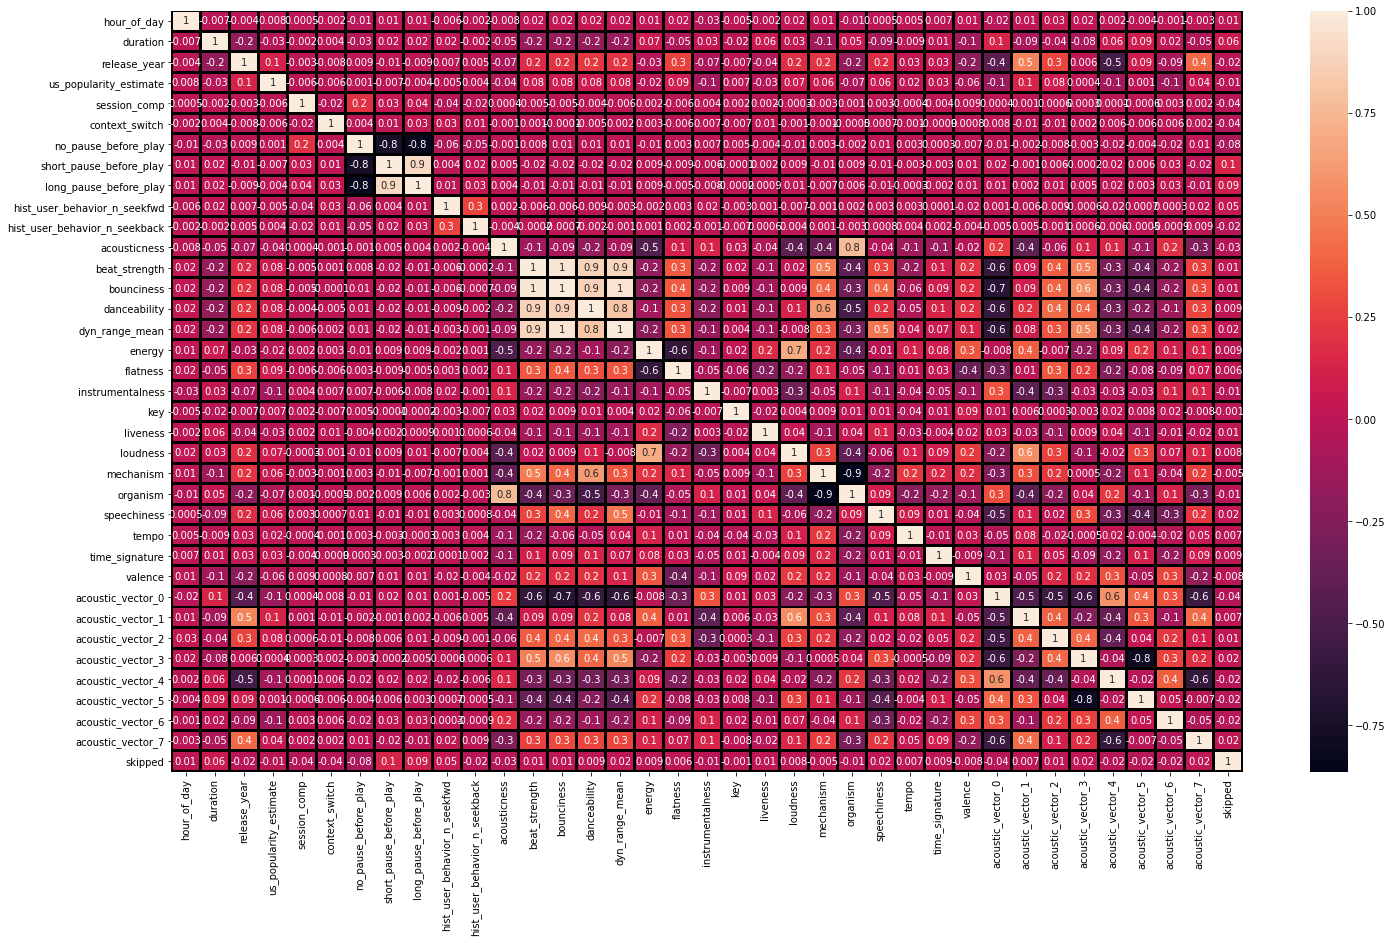

In [ ]:
plt.figure(figsize=(24,14))
sns.heatmap(df.corr(),annot=True,fmt='.1g', linewidths=2, linecolor='black')

In [ ]:
corr_matrix = df.corr()
print(corr_matrix["skipped"].sort_values(ascending=False))

skipped                          1.000000
short_pause_before_play          0.126978
long_pause_before_play           0.092755
duration                         0.061463
hist_user_behavior_n_seekfwd     0.052323
acoustic_vector_3                0.023747
speechiness                      0.021012
acoustic_vector_7                0.016450
dyn_range_mean                   0.015085
bounciness                       0.014912
hour_of_day                      0.014643
acoustic_vector_2                0.013552
liveness                         0.011041
beat_strength                    0.010545
danceability                     0.009379
time_signature                   0.009049
energy                           0.008963
loudness                         0.008438
acoustic_vector_1                0.007421
tempo                            0.006616
flatness                         0.006435
key                             -0.000954
mechanism                       -0.005458
valence                         -0

In [20]:
df = df.drop(['tempo','flatness','beat_strength','dyn_range_mean'],axis=1)
# tempo & flatness least correlated to target
# beatstrength and dyn_range_mean highly correlated to bounciness 

In [21]:
# short and long pause highly correlated
df['pause_before_play'] = (df['short_pause_before_play'] + df['long_pause_before_play'])/2
df = df.drop(['short_pause_before_play','long_pause_before_play'],axis=1)

In [ ]:
df['hist_user_behavior_reason_start'].value_counts()

fwdbtn        79912
trackdone     55075
clickrow      17514
backbtn       13034
appload        1942
playbtn         155
remote          136
trackerror       92
endplay          20
Name: hist_user_behavior_reason_start, dtype: int64

In [ ]:
df['context_type'].value_counts()

user_collection          67430
catalog                  38263
editorial_playlist       35663
radio                    21107
personalized_playlist     2976
charts                    2441
Name: context_type, dtype: int64

In [22]:
df["premium"] = df["premium"].astype(int)
df = df.replace({"mode" : {"major":1,"minor":0}})

In [ ]:
df.head()

,hour_of_day,date,duration,release_year,us_popularity_estimate,premium,session_comp,context_type,context_switch,no_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hist_user_behavior_reason_start,hist_user_behavior_reason_end,acousticness,bounciness,danceability,energy,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped,pause_before_play
0,16.0,7/15/2018,180.066666,2018,99.968133,1,0.05,editorial_playlist,0.0,0.0,0.0,0.0,True,trackdone,trackdone,0.015848,0.473455,0.653119,0.553465,3.484468e-03,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,False,0.0
1,16.0,7/15/2018,236.796371,2018,99.896728,1,0.10,editorial_playlist,0.0,1.0,0.0,0.0,True,trackdone,trackdone,0.061811,0.735661,0.877393,0.726828,1.031315e-07,7,0.104322,-5.319,0.824766,0,0.131391,0.061158,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,False,0.0
2,16.0,7/15/2018,231.266663,2018,99.999976,1,0.15,editorial_playlist,0.0,1.0,0.0,0.0,True,trackdone,trackdone,0.354116,0.540411,0.679719,0.563009,2.659035e-08,10,0.135776,-5.843,0.774327,1,0.296923,0.045354,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,False,0.0
3,16.0,7/15/2018,169.826675,2018,99.995038,1,0.20,editorial_playlist,0.0,1.0,0.0,0.0,True,trackdone,trackdone,0.769225,0.729224,0.864881,0.529484,6.598388e-06,1,0.103722,-7.756,0.630996,1,0.603271,0.229936,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,False,0.0
4,16.0,7/15/2018,210.545258,2018,99.998498,1,0.25,editorial_playlist,0.0,1.0,0.0,0.0,True,trackdone,trackdone,0.006602,0.794881,0.857778,0.650057,2.066649e-06,8,0.120842,-4.919,0.759465,1,0.170148,0.240980,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,False,0.0


In [23]:
# context switch is enough information for context, so context type not needed
df = df.drop(["context_type"],axis=1)
df = pd.get_dummies(df, columns=['hist_user_behavior_reason_start','hist_user_behavior_reason_end'], prefix = ['Start_reason','End_reason'])

In [24]:
df.shape

(167880, 52)

In [81]:
df.head()

,hour_of_day,date,duration,release_year,us_popularity_estimate,premium,session_comp,context_switch,no_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,acousticness,bounciness,danceability,energy,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped,pause_before_play,Start_reason_appload,Start_reason_backbtn,Start_reason_clickrow,Start_reason_endplay,Start_reason_fwdbtn,Start_reason_playbtn,Start_reason_remote,Start_reason_trackdone,Start_reason_trackerror,End_reason_backbtn,End_reason_clickrow,End_reason_endplay,End_reason_fwdbtn,End_reason_logout,End_reason_remote,End_reason_trackdone
0,16.0,7/15/2018,180.066666,2018,99.968133,1,0.05,0.0,0.0,0.0,0.0,True,0.015848,0.473455,0.653119,0.553465,3.484468e-03,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,False,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,16.0,7/15/2018,236.796371,2018,99.896728,1,0.10,0.0,1.0,0.0,0.0,True,0.061811,0.735661,0.877393,0.726828,1.031315e-07,7,0.104322,-5.319,0.824766,0,0.131391,0.061158,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,False,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,16.0,7/15/2018,231.266663,2018,99.999976,1,0.15,0.0,1.0,0.0,0.0,True,0.354116,0.540411,0.679719,0.563009,2.659035e-08,10,0.135776,-5.843,0.774327,1,0.296923,0.045354,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,False,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,16.0,7/15/2018,169.826675,2018,99.995038,1,0.20,0.0,1.0,0.0,0.0,True,0.769225,0.729224,0.864881,0.529484,6.598388e-06,1,0.103722,-7.756,0.630996,1,0.603271,0.229936,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,False,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,16.0,7/15/2018,210.545258,2018,99.998498,1,0.25,0.0,1.0,0.0,0.0,True,0.006602,0.794881,0.857778,0.650057,2.066649e-06,8,0.120842,-4.919,0.759465,1,0.170148,0.240980,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,False,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [25]:
df = df.drop(["hour_of_day","date"],axis=1)

In [26]:
df = df.replace({"hist_user_behavior_is_shuffle" : {False:0,True:1}})

In [27]:
df = df.replace({"skipped" : {False:0,True:1}})

In [105]:
df.head()

,duration,release_year,us_popularity_estimate,premium,session_comp,context_switch,no_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,acousticness,bounciness,danceability,energy,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped,pause_before_play,Start_reason_appload,Start_reason_backbtn,Start_reason_clickrow,Start_reason_endplay,Start_reason_fwdbtn,Start_reason_playbtn,Start_reason_remote,Start_reason_trackdone,Start_reason_trackerror,End_reason_backbtn,End_reason_clickrow,End_reason_endplay,End_reason_fwdbtn,End_reason_logout,End_reason_remote,End_reason_trackdone
0,180.066666,2018,99.968133,1,0.05,0.0,0.0,0.0,0.0,1,0.015848,0.473455,0.653119,0.553465,3.484468e-03,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,236.796371,2018,99.896728,1,0.10,0.0,1.0,0.0,0.0,1,0.061811,0.735661,0.877393,0.726828,1.031315e-07,7,0.104322,-5.319,0.824766,0,0.131391,0.061158,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,231.266663,2018,99.999976,1,0.15,0.0,1.0,0.0,0.0,1,0.354116,0.540411,0.679719,0.563009,2.659035e-08,10,0.135776,-5.843,0.774327,1,0.296923,0.045354,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,169.826675,2018,99.995038,1,0.20,0.0,1.0,0.0,0.0,1,0.769225,0.729224,0.864881,0.529484,6.598388e-06,1,0.103722,-7.756,0.630996,1,0.603271,0.229936,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,210.545258,2018,99.998498,1,0.25,0.0,1.0,0.0,0.0,1,0.006602,0.794881,0.857778,0.650057,2.066649e-06,8,0.120842,-4.919,0.759465,1,0.170148,0.240980,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


Feature selection using boruta

In [108]:
cols = df.columns.tolist()
len(cols)

50

In [28]:
cols = ['duration',
 'release_year',
 'us_popularity_estimate',
 'premium',
 'session_comp',
 'context_switch',
 'no_pause_before_play','pause_before_play','hist_user_behavior_n_seekfwd',
 'hist_user_behavior_n_seekback',
 'hist_user_behavior_is_shuffle','Start_reason_appload',
 'Start_reason_backbtn',
 'Start_reason_clickrow',
 'Start_reason_endplay',
 'Start_reason_fwdbtn',
 'Start_reason_playbtn',
 'Start_reason_remote',
 'Start_reason_trackdone',
 'Start_reason_trackerror',
 'End_reason_backbtn',
 'End_reason_clickrow',
 'End_reason_endplay',
 'End_reason_fwdbtn',
 'End_reason_logout',
 'End_reason_remote',
 'End_reason_trackdone','acousticness',
 'bounciness',
 'danceability',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mechanism',
 'mode',
 'organism',
 'speechiness',
 'time_signature',
 'valence',
 'acoustic_vector_0',
 'acoustic_vector_1',
 'acoustic_vector_2',
 'acoustic_vector_3',
 'acoustic_vector_4',
 'acoustic_vector_5',
 'acoustic_vector_6',
 'acoustic_vector_7',
 'skipped']

len(cols)

50

In [29]:
df = df[cols]

In [112]:
df.head()

,duration,release_year,us_popularity_estimate,premium,session_comp,context_switch,no_pause_before_play,pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,Start_reason_appload,Start_reason_backbtn,Start_reason_clickrow,Start_reason_endplay,Start_reason_fwdbtn,Start_reason_playbtn,Start_reason_remote,Start_reason_trackdone,Start_reason_trackerror,End_reason_backbtn,End_reason_clickrow,End_reason_endplay,End_reason_fwdbtn,End_reason_logout,End_reason_remote,End_reason_trackdone,acousticness,bounciness,danceability,energy,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,skipped
0,180.066666,2018,99.968133,1,0.05,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.015848,0.473455,0.653119,0.553465,3.484468e-03,1,0.678553,-6.577,0.546784,1,0.320668,0.069717,4,0.152255,-0.815775,0.386409,0.230160,0.028028,-0.333373,0.015452,-0.353590,0.205826,0
1,236.796371,2018,99.896728,1,0.10,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.061811,0.735661,0.877393,0.726828,1.031315e-07,7,0.104322,-5.319,0.824766,0,0.131391,0.061158,4,0.337152,-0.713646,0.363718,0.310315,-0.042222,-0.383164,0.066357,-0.365308,0.157920,0
2,231.266663,2018,99.999976,1,0.15,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.354116,0.540411,0.679719,0.563009,2.659035e-08,10,0.135776,-5.843,0.774327,1,0.296923,0.045354,4,0.373862,-0.742541,0.375599,0.252660,-0.049007,-0.299745,0.063341,-0.486689,0.181604,0
3,169.826675,2018,99.995038,1,0.20,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.769225,0.729224,0.864881,0.529484,6.598388e-06,1,0.103722,-7.756,0.630996,1,0.603271,0.229936,4,0.649420,-0.705116,0.317562,0.289141,-0.038920,-0.393358,0.092719,-0.364418,0.285603,0
4,210.545258,2018,99.998498,1,0.25,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.006602,0.794881,0.857778,0.650057,2.066649e-06,8,0.120842,-4.919,0.759465,1,0.170148,0.240980,4,0.652921,-0.868489,0.331280,0.210478,0.084740,-0.333287,-0.025706,-0.510350,0.182315,0


In [138]:
df.to_csv('file1.csv') 

In [ ]:
"""
!pip install boruta
features = [f for f in df.columns if f not in ['skipped']]
X = df[features].values
Y = df['skipped'].values

X = df.iloc[:,:49]
x = X.values
Y = df.iloc[:,49]
y = Y.values

from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor
import numpy as np
###initialize Boruta
forest = RandomForestRegressor(
   n_jobs = -1, 
   max_depth = 5
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   verbose=0, random_state=42,
   max_iter = 1 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(X,y) 
### print results
green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)
"""

In [163]:
corr_matrix = df.corr()
print(corr_matrix["skipped"].sort_values(ascending=False))

skipped                          1.000000
End_reason_fwdbtn                0.680506
Start_reason_fwdbtn              0.383116
End_reason_endplay               0.209849
End_reason_backbtn               0.203256
pause_before_play                0.111931
Start_reason_backbtn             0.066307
duration                         0.061463
hist_user_behavior_n_seekfwd     0.052323
End_reason_logout                0.039445
Start_reason_appload             0.036226
hist_user_behavior_is_shuffle    0.030787
End_reason_remote                0.027876
acoustic_vector_3                0.023747
speechiness                      0.021012
acoustic_vector_7                0.016450
bounciness                       0.014912
acoustic_vector_2                0.013552
Start_reason_remote              0.013449
liveness                         0.011041
time_signature                   0.009049
energy                           0.008963
loudness                         0.008438
acoustic_vector_1                0

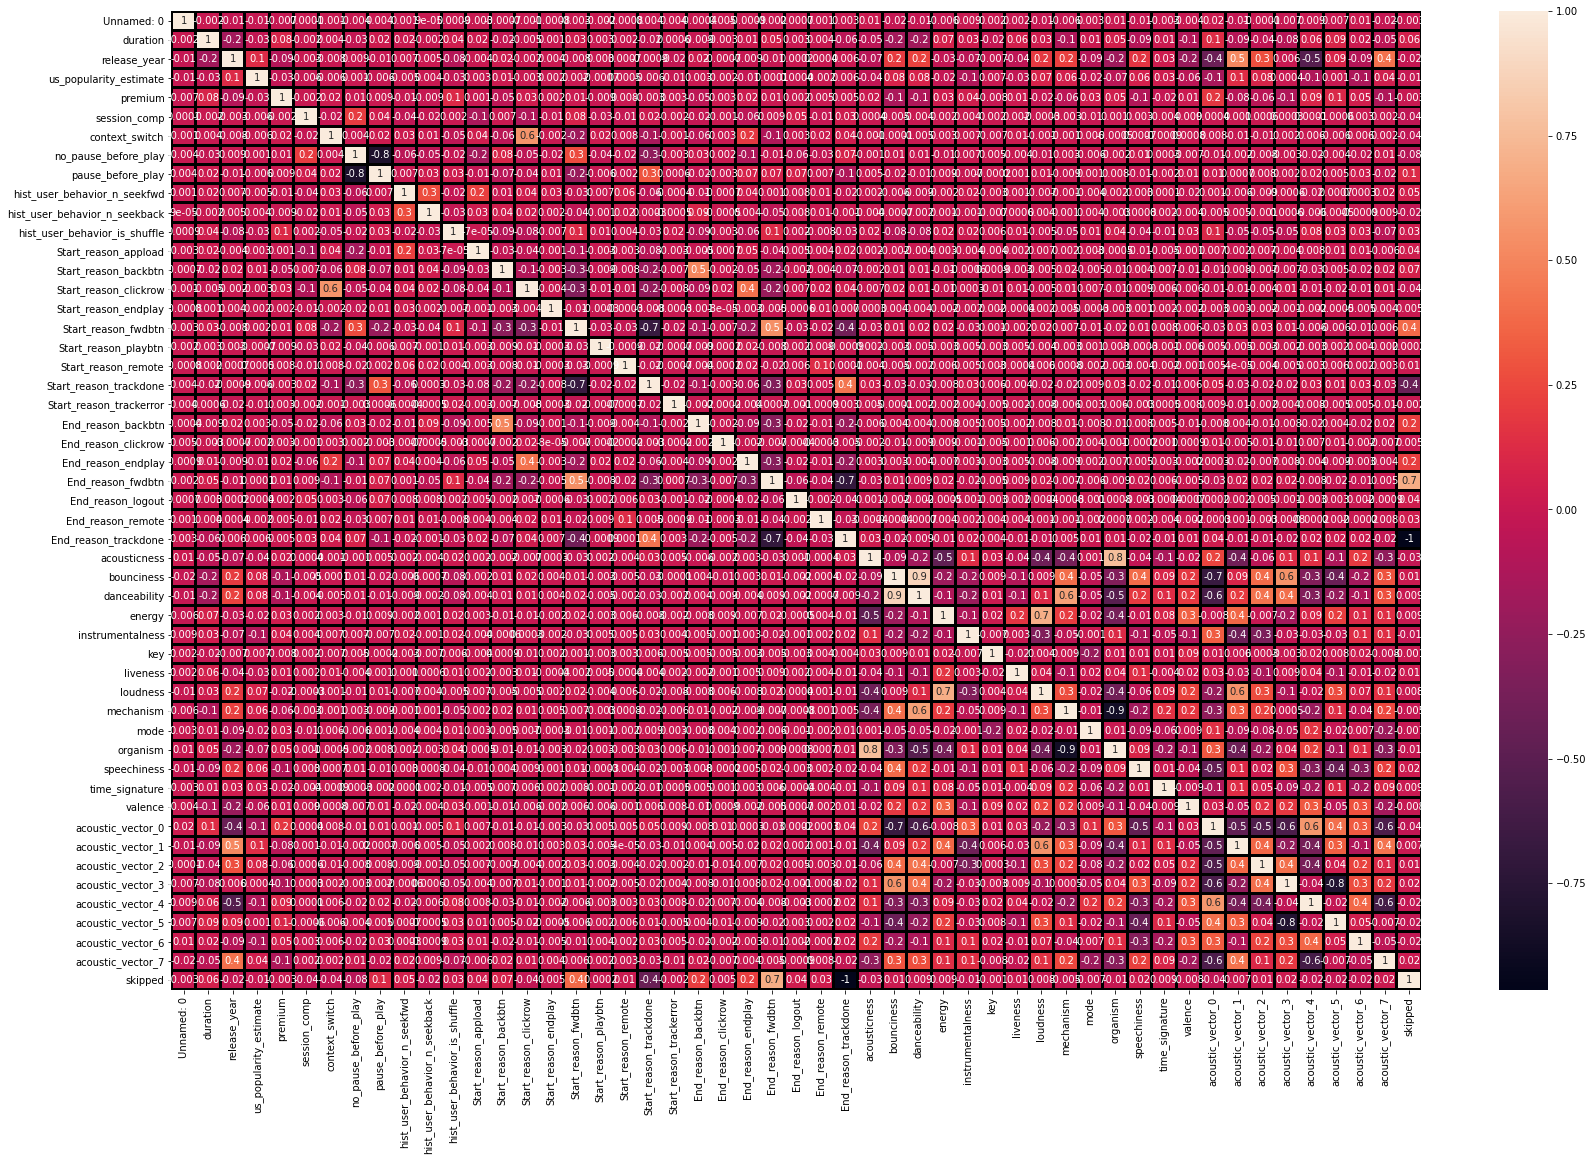

In [161]:
plt.figure(figsize=(28,18))
sns.heatmap(df.corr(),annot=True,fmt='.1g', linewidths=2, linecolor='black')

In [30]:
df = df.drop(['danceability','Start_reason_playbtn','key','Start_reason_trackerror','premium','End_reason_clickrow'],axis=1)

In [31]:
df.shape

(167880, 44)

In [168]:
X = df.iloc[:,:44]
y = df.iloc[:,44]
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_

In [169]:
importances

array([3.87486573e-03, 1.99406694e-03, 2.02034422e-03, 1.82120673e-03,
       4.14891654e-03, 1.38059832e-03, 6.00909713e-03, 8.42731017e-03,
       8.89429531e-03, 5.94617040e-03, 1.19729997e-03, 4.23846163e-03,
       6.28240698e-03, 5.26359344e-03, 1.42362887e-04, 3.45383378e-02,
       3.96550952e-04, 4.53741881e-02, 4.12407612e-02, 5.03764368e-02,
       2.08418556e-01, 1.57754460e-03, 8.52209667e-04, 5.20589782e-01,
       1.94599758e-03, 1.90657048e-03, 1.89254701e-03, 1.66807129e-03,
       1.95631684e-03, 2.01977568e-03, 1.88345911e-03, 7.22697154e-04,
       1.82229335e-03, 1.92746350e-03, 4.62086238e-04, 1.89045405e-03,
       1.86352732e-03, 1.82753221e-03, 1.79456084e-03, 1.88337496e-03,
       1.78777670e-03, 1.90397517e-03, 1.89011884e-03, 1.94603780e-03])

In [173]:
cols = df.columns.tolist()

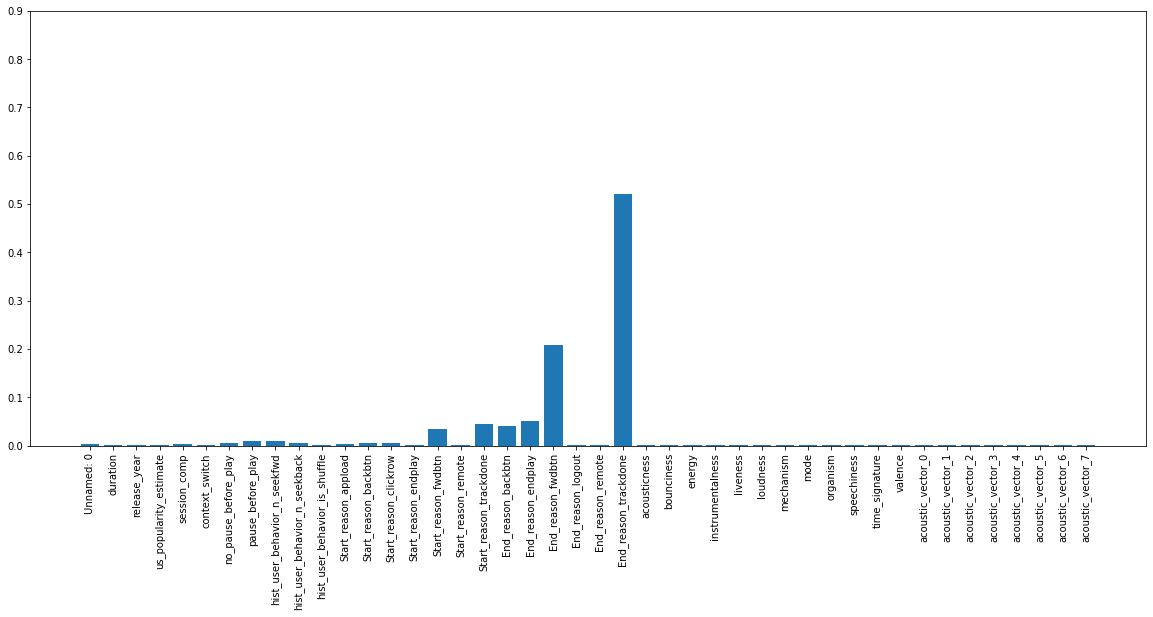

In [181]:
from matplotlib import pyplot
plt.figure(figsize=(20,8))
xx = [x for x in cols[:44]]
pyplot.bar(xx, importances)
plt.xticks(xx, cols[:44], rotation=90)
plt.yticks(np.arange(0, max(y), 0.1))
pyplot.show()

In [32]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,train_size=0.9)

In [33]:
y_train = train['skipped']
y_test = test['skipped']
x_train = train.drop(['skipped'], axis = 1)
x_test = test.drop(['skipped'], axis = 1)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(estimator  = svm.SVC(), 
                        param_grid = {'C': [1,10],'kernel': ['linear', 'rbf']})

_ = grid_clf.fit(x_train, y_train)
